<a href="https://colab.research.google.com/github/pedrxbro/ManipulacaoDeDadosFutebol/blob/main/Trabalho_2_1_Pandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/datasets/prateekchauhands/football-data-top-5-european-leagues?select=past-data.csv

Tópicos:


1. Filtros

  1.1 Simples: Temporada e ligas

  1.2 Composto: Times consistentes e times da virada.

2. Médias e Desvio Padrão

  2.1 Gols por liga.

  2.2 Faltas cometidas por liga.

  2.3 Cartões amarelos por liga.

  2.4 Cartões vermelhos por liga.


3. Operações Groupby

  3.1 Groupby entre:

  3.1.1 Agrupar times os times consistentes, previamente filtrado.

  3.1.2 Agrupar os times da virada, previamente filtrado.

  3.1.3 Agrupar os chutes toatais, em casa e fora. Que posteriormente irão resultar em um cálculo de taxa de conversão entre as ligas.

  3.2 Gráficos

  3.2.1 Gols totais: A soma dos gols da casa e fora, por liga.
  
  3.2.2 Liga mais precisa: Pegar o cálculo prévio e plotar em um gráfico, mostrando qual liga possui maior taxa de acerto nos chutes.

  3.2.3 Liga mais violenta: Com base nos cálculos de média enter faltas, cartões amarelos e vermelhos, é visto qual a liga possui o título de ''mais violenta'' entre essas.





In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
teams = pd.read_csv('past-data.csv')

<ipython-input-2-bab871ddd5ed>:1: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  teams = pd.read_csv('past-data.csv')


Filtros simples.


1.1.1 Primeiramente filtrar por temporada, visto que dentro do dataframe há outras temporadas avulsas, optei por deixar a mais recente da base de dados.

1.1.2 Segundamente, filtrar por liga. Criado uma função para extrair os dados por liga e atribuir à uma variável específica.


Agrupando dados qualitativos, que irão ser utilizados até o final do programa.

In [ ]:
#Filtrar para uma única temporada
filterSeason = teams['Season'] == '22-23'
season22_23 = teams[filterSeason]

#Filtrar por liga
def filterTeamsByLeague(teamsDataFrames):
  leagues = {
    "Premier League": teamsDataFrames[teamsDataFrames['Div'] == 'Premier League'],
    "LaLiga": teamsDataFrames[teamsDataFrames['Div'] == 'LaLiga'],
    "Serie A": teamsDataFrames[teamsDataFrames['Div'] == 'Serie A'],
    "Bundesliga": teamsDataFrames[teamsDataFrames['Div'] == 'Bundesliga'],
    "Ligue 1": teamsDataFrames[teamsDataFrames['Div'] == 'Ligue 1']
  }

  return leagues

teamsByLeague = filterTeamsByLeague(season22_23)

premierLeague = teamsByLeague["Premier League"]
laLiga = teamsByLeague["LaLiga"]
serieA = teamsByLeague["Serie A"]
bundesliga = teamsByLeague["Bundesliga"]
ligue1 = teamsByLeague["Ligue 1"]

1.2.1 Filtro composto que separa os times que começaram e terminaram o jogo ganhando, dos times que começaram perdendo e reverteram o resultado.


In [ ]:
def filterWinningTeams(teamsDataFrames, league):
  leagueDataFrame = teamsDataFrames[teamsDataFrames['Div'] == league]
  #Condição para o time da casa vencer no intervalo e no final (Casa e Fora)
  HTWins = (leagueDataFrame['HTHG'] > leagueDataFrame['HTAG']) & (leagueDataFrame['FTHG'] > leagueDataFrame['FTAG'])
  ATWins = (leagueDataFrame['HTAG'] > leagueDataFrame['HTHG']) & (leagueDataFrame['FTAG'] > leagueDataFrame['FTHG'])

  filterFinalWin = HTWins | ATWins
  winningTeamsAtHalfTimeAndFinal = leagueDataFrame[filterFinalWin]
  return winningTeamsAtHalfTimeAndFinal

def filterComebackTeams(teamsDataFrames, league):
  leagueDataFrame = teamsDataFrames[teamsDataFrames['Div'] == league]

  #Condição de virada (Casa e Fora)
  HTComeback = (leagueDataFrame['HTHG'] < leagueDataFrame['HTAG']) & (leagueDataFrame['FTHG'] > leagueDataFrame['FTAG'])
  ATComeback = (leagueDataFrame['HTAG'] < leagueDataFrame['HTHG']) & (leagueDataFrame['FTAG'] > leagueDataFrame['FTHG'])
  comebacks = leagueDataFrame[HTComeback | ATComeback]

  return comebacks

winningTeamsPremierLeague = filterWinningTeams(season22_23, 'Premier League')
comebackTeamsPremierLeague = filterComebackTeams(season22_23, 'Premier League')

winningTeamsLaLiga = filterWinningTeams(season22_23, 'LaLiga')
comebackTeamsLaLiga = filterComebackTeams(season22_23, 'LaLiga')

winningTeamsSerieA = filterWinningTeams(season22_23, 'Serie A')
comebackTeamsSerieA = filterComebackTeams(season22_23, 'Serie A')

winningTeamsBundesliga = filterWinningTeams(season22_23, 'Bundesliga')
comebackTeamsBundesliga = filterComebackTeams(season22_23, 'Bundesliga')

winningTeamsLigue1 = filterWinningTeams(season22_23, 'Ligue 1')
comebackTeamsLigue1 = filterComebackTeams(season22_23, 'Ligue 1')


3.1.1: Times consistentes por liga.

Isto é, quais foram os times que **mais** começaram e terminaram o jogo ganhando.

In [ ]:
def countConsistentTeams(winningTeamsAtHalfTimeAndFinal):
  #Agrupar por time e contar o número de vitórias no intervalo e no final
  winningTeamsCounts = winningTeamsAtHalfTimeAndFinal.groupby(['HomeTeam']).size() + winningTeamsAtHalfTimeAndFinal.groupby(['AwayTeam']).size()
  return winningTeamsCounts

def printConsistentTeamsCounts(consistentTeamsCount, league):
  consistentTeamsCount = consistentTeamsCount.sort_values(ascending=False)
  print(f"Top 5 times consistentes na {league}:")
  for team, count in consistentTeamsCount.items():
    print(f"{team}: {count}")

consistentTeamsCountPremierLeague = countConsistentTeams(winningTeamsPremierLeague)
printConsistentTeamsCounts(consistentTeamsCountPremierLeague.head(5), "Premier League")
print()

consistentTeamsCountLaLiga = countConsistentTeams(winningTeamsLaLiga)
printConsistentTeamsCounts(consistentTeamsCountLaLiga.head(5), "LaLiga")
print()

consistentTeamsCountSerieA = countConsistentTeams(winningTeamsSerieA)
printConsistentTeamsCounts(consistentTeamsCountSerieA.head(5), "Serie A")
print()

consistentTeamsCountBundesliga = countConsistentTeams(winningTeamsBundesliga)
printConsistentTeamsCounts(consistentTeamsCountBundesliga.head(5), "Bundesliga")
print()

consistentTeamsCountLigue1 = countConsistentTeams(winningTeamsLigue1)
printConsistentTeamsCounts(consistentTeamsCountLigue1.head(5), "Ligue 1")


Top 5 times consistentes na Premier League:
Aston Villa: 22
Arsenal: 20
Bournemouth: 20
Brentford: 18
Brighton: 17

Top 5 times consistentes na LaLiga:
Barcelona: 24
Ath Bilbao: 19
Ath Madrid: 19
Almeria: 18
Betis: 14

Top 5 times consistentes na Serie A:
Cremonese: 18
Atalanta: 17
Fiorentina: 15
Bologna: 14
Empoli: 11

Top 5 times consistentes na Bundesliga:
Bochum: 21
Dortmund: 19
Bayern Munich: 18
Ein Frankfurt: 16
Augsburg: 8

Top 5 times consistentes na Ligue 1:
Angers: 24
Ajaccio: 21
Auxerre: 15
Brest: 15
Clermont: 15


3.1.2: Times que deram a volta por cima.

Isto é, quais foram os times que **mais** realizaram viradas por liga.

In [ ]:
def countComebackTeams(comebacks):
  homeComebacks = comebacks[comebacks['HTHG'] < comebacks['HTAG']]
  awayComebacks = comebacks[comebacks['HTAG'] < comebacks['HTHG']]

  homeComebacksCount = homeComebacks.groupby('HomeTeam').size()
  awayComebacksCount = awayComebacks.groupby('AwayTeam').size()

  comebackTeamsCount = homeComebacksCount.add(awayComebacksCount, fill_value=0)

  return comebackTeamsCount

def printComebackTeamsCount(comebacksCount, league):
  comebackTeamsCount = comebacksCount.sort_values(ascending=False)
  print(f"Top 5 times que mais fizeram reviravoltas na {league}:")
  for team, count in comebackTeamsCount.items():
    print(f"{team}: {count}")

comebackTeamsCountPremierLeague = countComebackTeams(winningTeamsPremierLeague)
printComebackTeamsCount(comebackTeamsCountPremierLeague.head(5), "Premier League")
print()

comebackTeamsCountLaLiga = countComebackTeams(winningTeamsLaLiga)
printComebackTeamsCount(comebackTeamsCountLaLiga.head(5), "LaLiga")
print()

comebackTeamsCountSerieA = countComebackTeams(winningTeamsSerieA)
printComebackTeamsCount(comebackTeamsCountSerieA.head(5), "Serie A")
print()

comebackTeamsCountBundesliga = countComebackTeams(winningTeamsBundesliga)
printComebackTeamsCount(comebackTeamsCountBundesliga.head(5), "Bundesliga")
print()

comebackTeamsCountLigue1 = countComebackTeams(winningTeamsLigue1)
printComebackTeamsCount(comebackTeamsCountLigue1.head(5), "Ligue 1")

Top 5 times que mais fizeram reviravoltas na Premier League:
Bournemouth: 15.0
Aston Villa: 10.0
Brentford: 8.0
Brighton: 7.0
Arsenal: 3.0

Top 5 times que mais fizeram reviravoltas na LaLiga:
Almeria: 10.0
Ath Bilbao: 7.0
Ath Madrid: 6.0
Barcelona: 6.0
Betis: 4.0

Top 5 times que mais fizeram reviravoltas na Serie A:
Cremonese: 14.0
Bologna: 8.0
Empoli: 7.0
Atalanta: 6.0
Fiorentina: 6.0

Top 5 times que mais fizeram reviravoltas na Bundesliga:
Bochum: 15.0
FC Koln: 9.0
Augsburg: 7.0
Dortmund: 5.0
Ein Frankfurt: 5.0

Top 5 times que mais fizeram reviravoltas na Ligue 1:
Angers: 23.0
Ajaccio: 19.0
Auxerre: 11.0
Brest: 9.0
Clermont: 7.0


Coluna criada: Total gols. É a junção entre FTHG (Full Time Home goals) e FTAG (Full Time Away Goals). Ou seja, gols do time da casa no final do jogo e do time fora, respectivamente.

In [ ]:
#Calcular a quantidade total de gols para cada liga.
def calculateGoalsByLeague(league):
  league.loc[:, 'TotalGoals'] = league['FTHG'] + league['FTAG']
  totalLeagueGoals = league['TotalGoals'].sum()
  return totalLeagueGoals

premierLeagueTotalGoals = calculateGoalsByLeague(premierLeague)
laLigaTotalGoals = calculateGoalsByLeague(laLiga)
serieATotalGoals = calculateGoalsByLeague(serieA)
bundesligaTotalGoals = calculateGoalsByLeague(bundesliga)
ligue1TotalGoals = calculateGoalsByLeague(ligue1)

3.2.1: Gráfico para os gols totais das determinadas ligas.

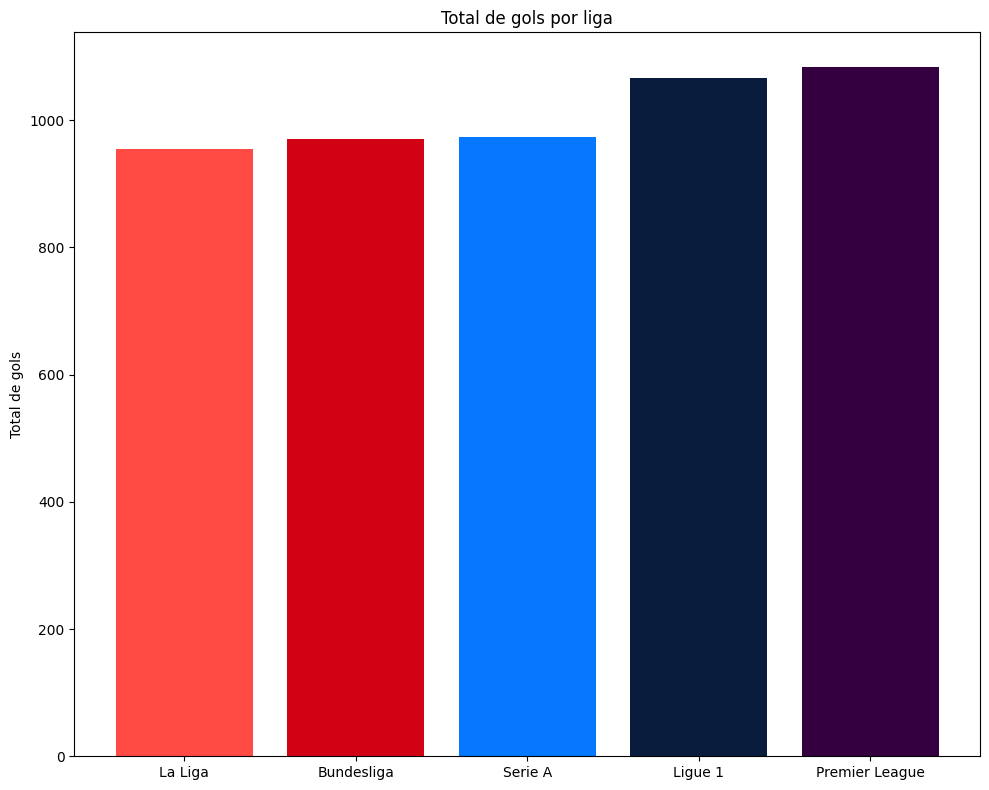

In [ ]:
allLeagues = ['Premier League', 'La Liga', 'Serie A', 'Bundesliga', 'Ligue 1']
leagueColors = ['#FF4B44', '#D10214', '#0578FF', '#091C3E', '#340040']
totalGoals = [premierLeagueTotalGoals, laLigaTotalGoals, serieATotalGoals, bundesligaTotalGoals, ligue1TotalGoals]

#Ordenar em ordem crescende, tanto os nomes das ligas, quanto seus respectivos gols.
allLeagues, totalGoals = zip(*sorted(zip(allLeagues, totalGoals), key=lambda x: x[1]))

plt.figure(figsize=(10, 8))
#Cores características das respectivas ligas.
plt.bar(allLeagues, totalGoals, color = leagueColors)
plt.title('Total de gols por liga')
plt.ylabel('Total de gols')
plt.tight_layout()
plt.savefig('TotalGolsPorLiga.png')
plt.show()

2.1 - Cálculo de média e variação média para os gols totais de cada liga.

In [ ]:
#Calcular a média e desvio padrão de todos os gols por liga
def calculateMeanAndStandardDeviation(teamsDataFrames, columnName):
  mean = teamsDataFrames[columnName].mean()
  std = teamsDataFrames[columnName].std()
  return mean, std

meanPremierLeagueGoals, stdPremierLeagueGoals = calculateMeanAndStandardDeviation(premierLeague, ['TotalGoals'])
meanLaLigaGoals, stdLaLigaGoals = calculateMeanAndStandardDeviation(laLiga, ['TotalGoals'])
meanSerieAGoals, stdSerieAGoals = calculateMeanAndStandardDeviation(serieA, ['TotalGoals'])
meanBundesligaGoals, stdBundesligaGoals = calculateMeanAndStandardDeviation(bundesliga, ['TotalGoals'])
meanLigue1Goals, stdLigue1Goals = calculateMeanAndStandardDeviation(ligue1, ['TotalGoals'])

3.1.3: Contar os chutes, por liga.

 Após isso, é feito o cálculo de taxa de conversão, ou seja, a cada quantos chutes, é resultante em gol.

In [ ]:
def countShotsPerLeague(teamsDataFrames):
  shotsPerLeague = teamsDataFrames.groupby('Div')[['HS', 'AS']].sum()
  shotsPerLeague['TotalShots'] = shotsPerLeague['HS'] + shotsPerLeague['AS']

  return shotsPerLeague

def countConversionRate(teamsDataFrames, league, leagueTotalGoals):
  shotsPerLeague = countShotsPerLeague(teamsDataFrames)
  totalShots = shotsPerLeague.loc[league, 'TotalShots']
  conversionRate = (leagueTotalGoals / totalShots) * 100

  return conversionRate

premierLeagueConversionRate = countConversionRate(season22_23, 'Premier League', premierLeagueTotalGoals)
laLigaConversionRate = countConversionRate(season22_23, 'LaLiga', laLigaTotalGoals)
serieAConversionRate = countConversionRate(season22_23, 'Serie A', serieATotalGoals)
bundesligaConversionRate = countConversionRate(season22_23, 'Bundesliga', bundesligaTotalGoals)
ligue1ConversionRate = countConversionRate(season22_23, 'Ligue 1', ligue1TotalGoals)

3.2.2: Gráfico para mostrar qual liga é mais precisa.

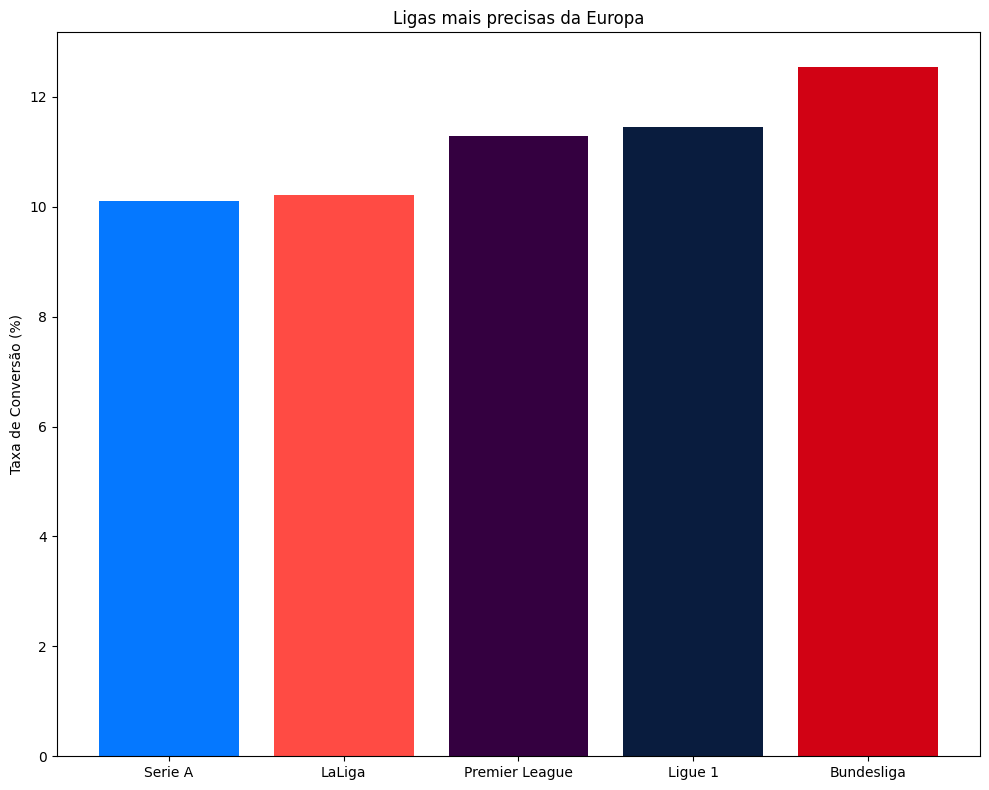

In [ ]:
leagues = ['Premier League', 'LaLiga', 'Serie A', 'Bundesliga', 'Ligue 1']
leagueColors = '#0578FF','#FF4B44','#340040','#091C3E','#D10214'

conversionRates = [premierLeagueConversionRate, laLigaConversionRate, serieAConversionRate, bundesligaConversionRate, ligue1ConversionRate]
leagues, conversionRates = zip(*sorted(zip(leagues, conversionRates), key=lambda x: x[1]))

plt.figure(figsize=(10, 8))
plt.bar(leagues, conversionRates, color = leagueColors)
plt.ylabel('Taxa de Conversão (%)')
plt.title('Ligas mais precisas da Europa')
plt.tight_layout()
plt.savefig('TaxaConversaoLigas.png')
plt.show()

2.1: Contagem de faltas. Média e desvio padrão das faltas, para cada liga.

In [ ]:
def countFoulsPerLeague(teamsDataFrames, league):
  leagueDataFrame = teamsDataFrames[teamsDataFrames['Div'] == league]
  totalFouls = leagueDataFrame['HF'] + leagueDataFrame['AF']
  totalFoulsInLeague = totalFouls.sum()

  meanFouls = totalFouls.mean()
  stdFouls = totalFouls.std()

  return totalFoulsInLeague, meanFouls, stdFouls

premierLeagueTotalFouls, premierLeagueMean, premierLeagueStdDev = countFoulsPerLeague(season22_23, 'Premier League')
laLigaTotalFouls, laLigaMean, laLigaStdDev = countFoulsPerLeague(season22_23, 'LaLiga')
serieATotalFouls, serieAMean, serieAStdDev = countFoulsPerLeague(season22_23, 'Serie A')
bundesligaTotalFouls, bundesligaMean, bundesligaStdDev = countFoulsPerLeague(season22_23, 'Bundesliga')
ligue1TotalFouls, ligue1Mean, ligue1StdDev = countFoulsPerLeague(season22_23, 'Ligue 1')

2.3: Contagem de cartoes amarelos. Média e desvio padrão para cada liga.

In [ ]:
def countYellowCardsPerLeague(teamsDataFrames, league):
  leagueDataFrame = teamsDataFrames[teamsDataFrames['Div'] == league]
  totalYellowCards = leagueDataFrame['HY'] + leagueDataFrame['AY']
  totalYellowCardsInLeague = totalYellowCards.sum()

  meanYellowCards = totalYellowCards.mean()
  stdYellowCards = totalYellowCards.std()

  return totalYellowCardsInLeague, meanYellowCards, stdYellowCards

premierLeagueTotalYellowCards, premierLeagueMeanYellow, premierLeagueStdDevYellow = countYellowCardsPerLeague(season22_23, 'Premier League')
laLigaTotalYellowCards, laLigaMeanYellow, laLigaStdDevYellow = countYellowCardsPerLeague(season22_23, 'LaLiga')
serieATotalYellowCards, serieAMeanYellow, serieAStdDevYellow = countYellowCardsPerLeague(season22_23, 'Serie A')
bundesligaTotalYellowCards, bundesligaMeanYellow, bundesligaStdDevYellow = countYellowCardsPerLeague(season22_23, 'Bundesliga')
ligue1TotalYellowCards, ligue1MeanYellow, ligue1StdDevYellow = countYellowCardsPerLeague(season22_23, 'Ligue 1')


2.4 - Contagem de cartões vermelhos. Média e desvio padrão para cada liga.

In [ ]:
def countRedCardsPerLeague(teamsDataFrames, league):
  leagueDataFrame = teamsDataFrames[teamsDataFrames['Div'] == league]
  totalRedCards = leagueDataFrame['HR'] + leagueDataFrame['AR']
  totalRedCardsInLeague = totalRedCards.sum()

  meanRedCards = totalRedCards.mean()
  stdRedCards = totalRedCards.std()

  return totalRedCardsInLeague, meanRedCards, stdRedCards

premierLeagueTotalRedCards, premierLeagueMeanRed, premierLeagueStdDevRed = countRedCardsPerLeague(season22_23, 'Premier League')
laLigaTotalRedCards, laLigaMeanRed, laLigaStdDevRed = countRedCardsPerLeague(season22_23, 'LaLiga')
serieATotalRedCards, serieAMeanRed, serieAStdDevRed = countRedCardsPerLeague(season22_23, 'Serie A')
bundesligaTotalRedCards, bundesligaMeanRed, bundesligaStdDevRed = countRedCardsPerLeague(season22_23, 'Bundesliga')
ligue1TotalRedCards, ligue1MeanRed, ligue1StdDevRed = countRedCardsPerLeague(season22_23, 'Ligue 1')

Calculando, organizando as médias e ordenando antes de plotar.

In [ ]:
leagues = ['Premier League', 'LaLiga', 'Serie A', 'Bundesliga', 'Ligue 1']
foulMeans = [premierLeagueMean, laLigaMean, serieAMean, bundesligaMean, ligue1Mean]
yellowCardMeans = [premierLeagueMeanYellow, laLigaMeanYellow, serieAMeanYellow, bundesligaMeanYellow, ligue1MeanYellow]
redCardMeans = [premierLeagueMeanRed, laLigaMeanRed, serieAMeanRed, bundesligaMeanRed, ligue1MeanRed]

#Calculando a soma das médias por liga.
total_means = [foulMeans[i] + yellowCardMeans[i] + redCardMeans[i] for i in range(len(leagues))]
#Criando um dicionário com as ligas e suas respectivas médias totais.
leagueTotals = dict(zip(leagues, total_means))
#Ordenando o dicionário pela soma das médias em ordem decrescente.
sortedLeagueTotals = sorted(leagueTotals.items(), key=lambda x: x[1], reverse=True)
#Separando os nomes das ligas e as somas totais.
leaguesSorted = [item[0] for item in sortedLeagueTotals]
totalMeansSorted = [item[1] for item in sortedLeagueTotals]

3.2.3: Plot das ligas mais violentas

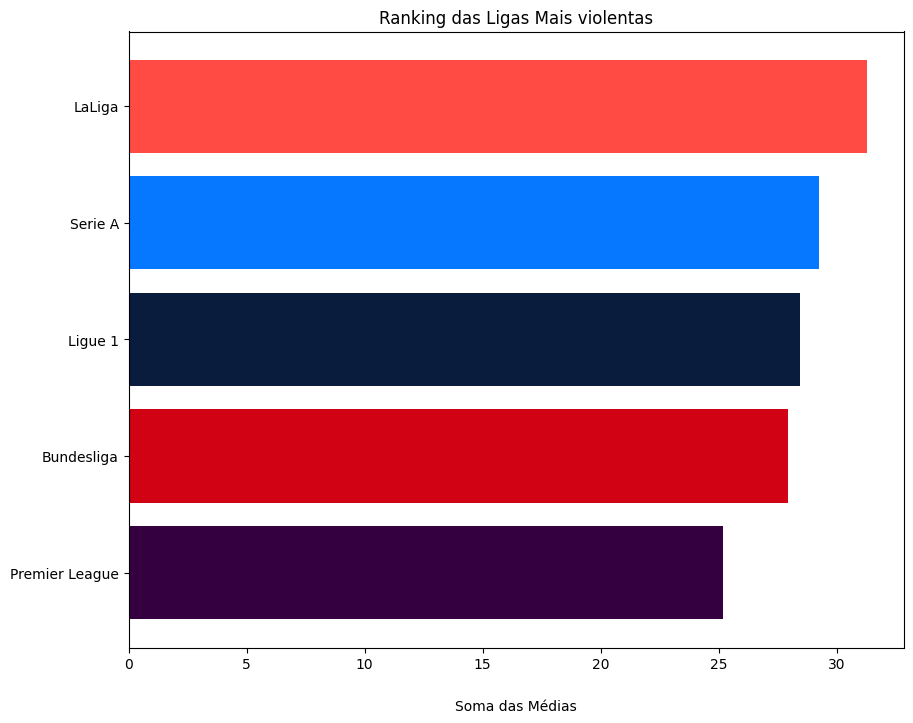

In [ ]:
leagueColors = ('#FF4B44','#0578FF', '#091C3E', '#D10214', '#340040')
plt.figure(figsize=(10, 8))
plt.barh(leaguesSorted, totalMeansSorted, color= leagueColors)
plt.xlabel('Soma das Médias', labelpad = 20)
plt.title('Ranking das Ligas Mais violentas')
plt.gca().invert_yaxis() #Inverter a ordem das ligas para começar com a mais violenta.
plt.savefig('LigasMaisViolentas.png')
plt.show()


Salvar os filtros em arquivos .csv

In [ ]:
def saveDataToCsv(data, fileName):
  columnsToSave = ['Season', 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR']
  data_to_save = data[columnsToSave]
  data_to_save.to_csv(fileName, index=False)

filteredDataByLeague = {
  'Premier League': premierLeague,
  'LaLiga': laLiga,
  'Serie A': serieA,
  'Bundesliga': bundesliga,
  'Ligue 1': ligue1
}

#Salvar filtros simples: temporada e liga.
for leagueName, leagueData in filteredDataByLeague.items():
  saveDataToCsv(leagueData, f'filtered_{leagueName.lower().replace(" ", "_")}.csv')

winningTeamsByLeague = {
  'Premier League': winningTeamsPremierLeague,
  'LaLiga': winningTeamsLaLiga,
  'Serie A': winningTeamsSerieA,
  'Bundesliga': winningTeamsBundesliga,
  'Ligue 1': winningTeamsLigue1
}

comebackTeamsByLeague = {
  'Premier League': comebackTeamsPremierLeague,
  'LaLiga': comebackTeamsLaLiga,
  'Serie A': comebackTeamsSerieA,
  'Bundesliga': comebackTeamsBundesliga,
  'Ligue 1': comebackTeamsLigue1
}

#Salvar filtros compostos: times consistentes e times da virada
for leagueName, winningTeamsData in winningTeamsByLeague.items():
  saveDataToCsv(winningTeamsData, f'winningTeams_{leagueName.lower().replace(" ", "_")}.csv')

for leagueName, comebackTeamsData in comebackTeamsByLeague.items():
  saveDataToCsv(comebackTeamsData, f'comebackTeams_{leagueName.lower().replace(" ", "_")}.csv')